In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [3]:
train = pd.read_csv('bigmart_train.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.shape

(8523, 12)

## Treat Missing values

In [8]:
train.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

Item_weight: 17% missing values
Outlet_size: 28% missing values

In [9]:
print(train['Item_Weight'].describe())
print(train['Item_Weight'].mean())

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64
12.857645184136183


In [10]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

<Figure size 1728x1728 with 0 Axes>

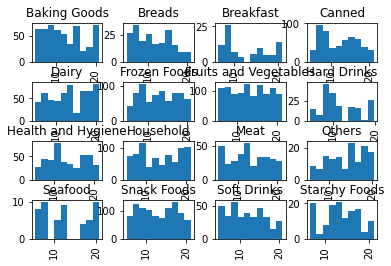

In [11]:
plt.figure(figsize=(24,24))
train.hist('Item_Weight', by='Item_Type')
plt.show()

In [12]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:

def fill_missing(cols):
    print('call in function')
    item_type   = cols[0]
    item_weight = cols[1]
    
    if pd.isnull(item_weight):
        return train[train['Item_Type'] == item_type]['Item_Weight'].mean()
    else:
        return item_weight

In [14]:
#train[train['Item_Type'] == 'Dairy']['Item_Weight'].mean()

### Apply: For requested columns, apply the user defined functions. Will iterate at row level

In [15]:
train['Item_Weight'] = train[['Item_Type', 'Item_Weight']].apply(fill_missing, axis=1)

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in function
call in functi

In [16]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.39500,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.98788,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [17]:
train.iloc[7]

Item_Identifier                          FDP10
Item_Weight                           12.98788
Item_Fat_Content                       Low Fat
Item_Visibility                        0.12747
Item_Type                          Snack Foods
Item_MRP                              107.7622
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                    4022.7636
Name: 7, dtype: object

In [18]:
train[train['Item_Type'] == 'Snack Foods']['Item_Weight'].mean()

12.987879554655894

In [19]:
#Item weight : missing values treated with grouped mean 
train.iloc[7]

Item_Identifier                          FDP10
Item_Weight                           12.98788
Item_Fat_Content                       Low Fat
Item_Visibility                        0.12747
Item_Type                          Snack Foods
Item_MRP                              107.7622
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                    4022.7636
Name: 7, dtype: object

<AxesSubplot:ylabel='Density'>

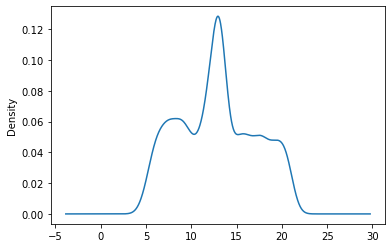

In [20]:
train['Item_Weight'].plot(kind='kde')

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [22]:
train.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [23]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [24]:
#mode:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [25]:
train[train['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [26]:
2793+2410

5203

In [27]:
#Outlet size = Missing value treated by Mode
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [28]:
train['Outlet_Size'].describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

In [29]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [30]:
print(train['Item_Fat_Content'].unique())
print(train['Item_Fat_Content'].value_counts())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [31]:
train['Item_Fat_Content'].dtype

dtype('O')

In [32]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['reg'], 'Regular')

In [33]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [35]:
train.isnull().mean()

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

int64
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


<AxesSubplot:ylabel='Density'>

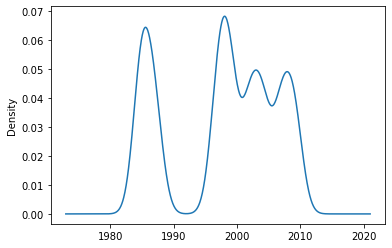

In [36]:
print(train['Outlet_Establishment_Year'].dtype)
print(train['Outlet_Establishment_Year'].describe())
train['Outlet_Establishment_Year'].plot(kind='kde')

In [37]:
(2021 - train['Outlet_Establishment_Year']).describe()

count    8523.000000
mean       23.168133
std         8.371760
min        12.000000
25%        17.000000
50%        22.000000
75%        34.000000
max        36.000000
Name: Outlet_Establishment_Year, dtype: float64

<AxesSubplot:ylabel='Density'>

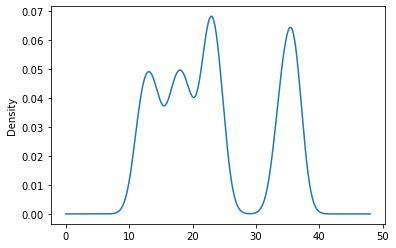

In [38]:
(2021 - train['Outlet_Establishment_Year']).plot(kind='kde')

In [39]:
#Distribution are same but age gives more better insights about outlet compared to just the year of opening
train['Age'] = 2021 - train['Outlet_Establishment_Year']

<AxesSubplot:ylabel='Density'>

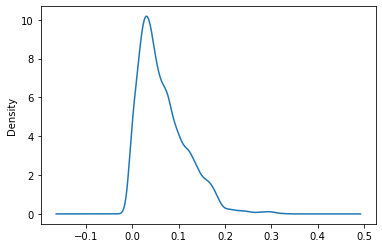

In [40]:
train['Item_Visibility'].plot(kind='kde')

<AxesSubplot:>

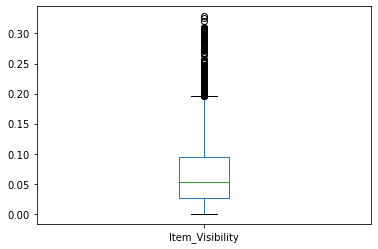

In [41]:
train['Item_Visibility'].plot(kind='box')

array([[<AxesSubplot:title={'center':'Item_Visibility'}>]], dtype=object)

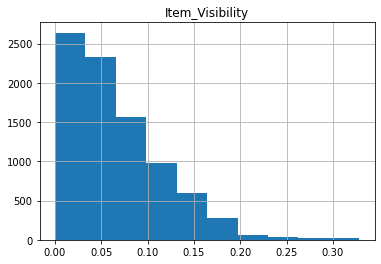

In [42]:
train.hist('Item_Visibility')

Looks there are outliers in item visiblity - Lets check the % of outliers

In [43]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
print('Q1 is {}, Q3 is {}'.format(Q1, Q3))

Q1 is 0.0269894775, Q3 is 0.0945852925


In [44]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [45]:
IQR = Q3 - Q1

In [46]:
filt_train = train[(train['Item_Visibility'] >= (Q1 - 1.5*IQR)) & (train['Item_Visibility'] <= (Q3 + 1.5*IQR))]

In [47]:
train['Item_Visibility'].count()

8523

In [48]:
print('{} % is outliers in Item visibility'.format(((8523-8379)/8523 * 100)))

1.689545934530095 % is outliers in Item visibility


In [49]:
((train.shape[0] - filt_train.shape[0])/train.shape[0]) * 100

1.689545934530095

In [50]:
#copy the filt_train to train set
train = filt_train.copy()
train.shape

(8379, 13)

train_visibility => Let's convert to categories so it could explain well instead of continous values

In [51]:
train['Item_Visibility'].min(), train['Item_Visibility'].max()

(0.0, 0.195721125)

In [52]:
train['Item_Visibility'].max()/3, train['Item_Visibility'].max()/3*2, train['Item_Visibility'].max()/3*3

(0.065240375, 0.13048075, 0.195721125)

In [53]:
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], bins=[0, 0.06, 0.13, 0.2], 
                                       labels=['Low viz', 'Viz', 'High Viz'], include_lowest=True)

In [54]:
train['Item_Visibility_bins'].unique()

['Low viz', 'Viz', 'High Viz']
Categories (3, object): ['Low viz' < 'Viz' < 'High Viz']

In [55]:
train['Item_Visibility_bins'].value_counts()

Low viz     4658
Viz         2828
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8379 non-null   object  
 1   Item_Weight                8379 non-null   float64 
 2   Item_Fat_Content           8379 non-null   object  
 3   Item_Visibility            8379 non-null   float64 
 4   Item_Type                  8379 non-null   object  
 5   Item_MRP                   8379 non-null   float64 
 6   Outlet_Identifier          8379 non-null   object  
 7   Outlet_Establishment_Year  8379 non-null   int64   
 8   Outlet_Size                8379 non-null   object  
 9   Outlet_Location_Type       8379 non-null   object  
 10  Outlet_Type                8379 non-null   object  
 11  Item_Outlet_Sales          8379 non-null   float64 
 12  Age                        8379 non-null   int64   
 13  Item_Visibility_bins       8379 n

In [57]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1208
Snack Foods              1181
Household                 897
Frozen Foods              845
Dairy                     670
Canned                    638
Baking Goods              631
Health and Hygiene        516
Soft Drinks               439
Meat                      418
Breads                    248
Hard Drinks               211
Others                    167
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64

In [58]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [59]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [60]:
train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [61]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store         939
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8379 non-null   object  
 1   Item_Weight                8379 non-null   float64 
 2   Item_Fat_Content           8379 non-null   object  
 3   Item_Visibility            8379 non-null   float64 
 4   Item_Type                  8379 non-null   object  
 5   Item_MRP                   8379 non-null   float64 
 6   Outlet_Identifier          8379 non-null   object  
 7   Outlet_Establishment_Year  8379 non-null   int64   
 8   Outlet_Size                8379 non-null   object  
 9   Outlet_Location_Type       8379 non-null   object  
 10  Outlet_Type                8379 non-null   object  
 11  Item_Outlet_Sales          8379 non-null   float64 
 12  Age                        8379 non-null   int64   
 13  Item_Visibility_bins       8379 n

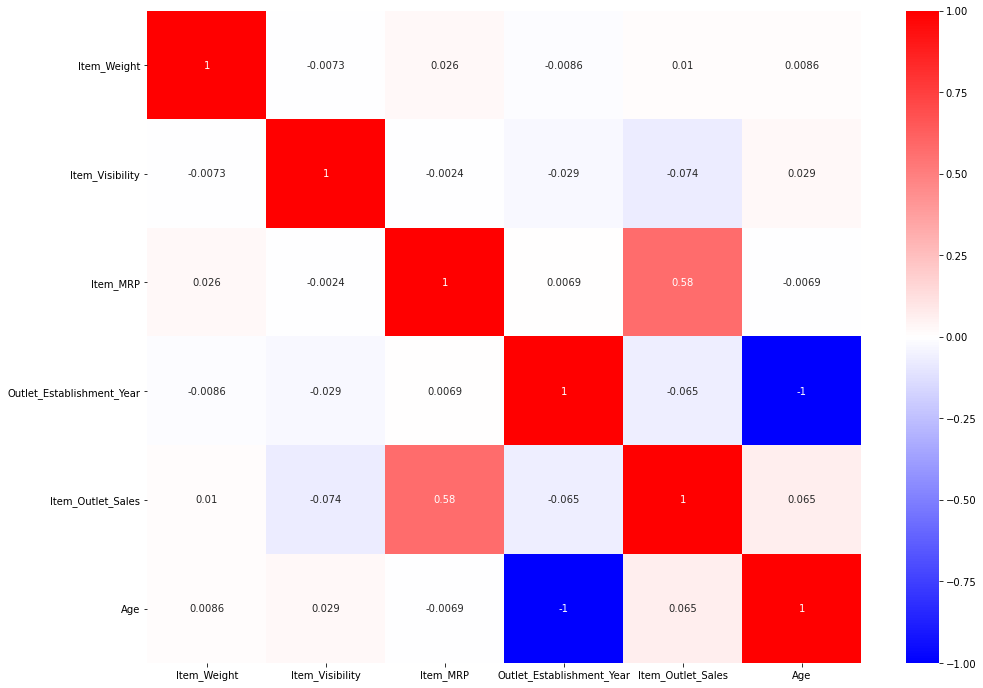

In [63]:
import seaborn as sns
plt.figure(figsize=(16,12))
correlation = train.corr()
sns.heatmap(correlation, annot=True, cmap='bwr')
plt.show()

In [64]:
train = pd.get_dummies(train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 
                                       'Outlet_Type', 'Item_Visibility_bins' ])
cols_to_drop = ['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year']

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8379 non-null   object 
 1   Item_Weight                    8379 non-null   float64
 2   Item_Visibility                8379 non-null   float64
 3   Item_Type                      8379 non-null   object 
 4   Item_MRP                       8379 non-null   float64
 5   Outlet_Identifier              8379 non-null   object 
 6   Outlet_Establishment_Year      8379 non-null   int64  
 7   Item_Outlet_Sales              8379 non-null   float64
 8   Age                            8379 non-null   int64  
 9   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 10  Item_Fat_Content_Regular       8379 non-null   uint8  
 11  Outlet_Size_High               8379 non-null   uint8  
 12  Outlet_Size_Medium             8379 non-null   u

In [66]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Age,Item_Fat_Content_Low Fat,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,22,1,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,12,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,22,1,...,1,0,0,0,1,0,0,1,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,23,0,...,0,0,1,1,0,0,0,1,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,34,1,...,0,0,1,0,1,0,0,1,0,0


In [67]:
final_train = train.drop(columns=cols_to_drop, axis=1)
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8379 non-null   float64
 1   Item_MRP                       8379 non-null   float64
 2   Item_Outlet_Sales              8379 non-null   float64
 3   Age                            8379 non-null   int64  
 4   Item_Fat_Content_Low Fat       8379 non-null   uint8  
 5   Item_Fat_Content_Regular       8379 non-null   uint8  
 6   Outlet_Size_High               8379 non-null   uint8  
 7   Outlet_Size_Medium             8379 non-null   uint8  
 8   Outlet_Size_Small              8379 non-null   uint8  
 9   Outlet_Location_Type_Tier 1    8379 non-null   uint8  
 10  Outlet_Location_Type_Tier 2    8379 non-null   uint8  
 11  Outlet_Location_Type_Tier 3    8379 non-null   uint8  
 12  Outlet_Type_Grocery Store      8379 non-null   u

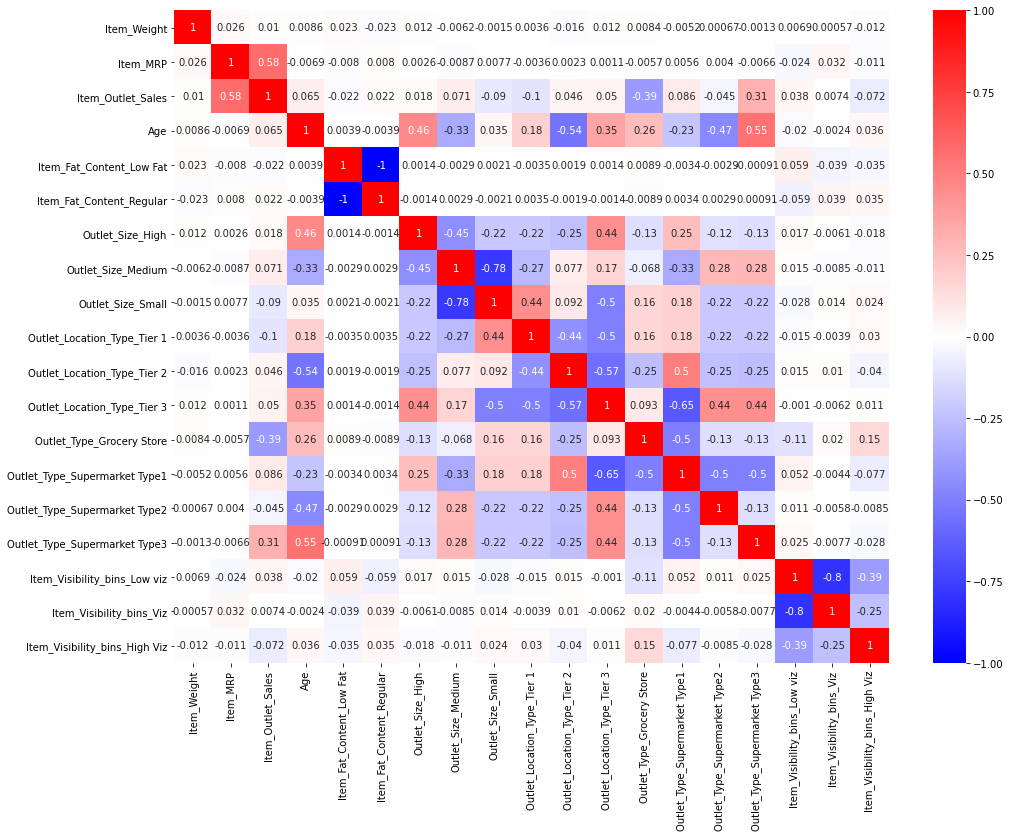

In [68]:
import seaborn as sns
plt.figure(figsize=(16,12))
correlation = final_train.corr()
sns.heatmap(correlation, annot=True, cmap='bwr')
plt.show()

In [347]:
correlation[(correlation['Item_Outlet_Sales'] > 0.1) | (correlation['Item_Outlet_Sales'] < -0.1)]

,Item_Weight,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
Item_MRP,0.026311,1.000000,0.577367,-0.006896,-0.008048,0.008048,0.002599,-0.008736,0.007692,-0.003574,0.002252,0.001099,-0.005693,0.005560,0.004025,-0.006640,-0.023637,0.031896,-0.010818
Item_Outlet_Sales,0.010205,0.577367,1.000000,0.065382,-0.021670,0.021670,0.017882,0.071209,-0.090186,-0.103378,0.046018,0.050239,-0.390714,0.085544,-0.045038,0.308155,0.037573,0.007387,-0.071820
Outlet_Location_Type_Tier 1,0.003605,-0.003574,-0.103378,0.183650,-0.003463,0.003463,-0.218320,-0.266756,0.444314,1.000000,-0.435440,-0.495334,0.162550,0.182155,-0.217793,-0.218716,-0.014896,-0.003946,0.030032
Outlet_Type_Grocery Store,0.008403,-0.005693,-0.390714,0.263397,0.008920,-0.008920,-0.125679,-0.068021,0.162550,0.162550,-0.250667,0.093072,1.000000,-0.501202,-0.125376,-0.125907,-0.112697,0.020065,0.150717
Outlet_Type_Supermarket Type3,-0.001255,-0.006640,0.308155,0.549453,-0.000912,0.000912,-0.125378,0.281620,-0.218716,-0.218716,-0.250066,0.441552,-0.125907,-0.499999,-0.125075,1.000000,0.024580,-0.007673,-0.027821


## ML Model

In [70]:
X = final_train.drop('Item_Outlet_Sales', axis=1)
Y = final_train['Item_Outlet_Sales']
print(X.shape, Y.shape)

(8379, 18) (8379,)


In [71]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [72]:
dc = {}

for i in final_train.columns:
    dc[i] = i.replace(' ', '_')
print(dc)

{'Item_Weight': 'Item_Weight', 'Item_MRP': 'Item_MRP', 'Item_Outlet_Sales': 'Item_Outlet_Sales', 'Age': 'Age', 'Item_Fat_Content_Low Fat': 'Item_Fat_Content_Low_Fat', 'Item_Fat_Content_Regular': 'Item_Fat_Content_Regular', 'Outlet_Size_High': 'Outlet_Size_High', 'Outlet_Size_Medium': 'Outlet_Size_Medium', 'Outlet_Size_Small': 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1': 'Outlet_Location_Type_Tier_1', 'Outlet_Location_Type_Tier 2': 'Outlet_Location_Type_Tier_2', 'Outlet_Location_Type_Tier 3': 'Outlet_Location_Type_Tier_3', 'Outlet_Type_Grocery Store': 'Outlet_Type_Grocery_Store', 'Outlet_Type_Supermarket Type1': 'Outlet_Type_Supermarket_Type1', 'Outlet_Type_Supermarket Type2': 'Outlet_Type_Supermarket_Type2', 'Outlet_Type_Supermarket Type3': 'Outlet_Type_Supermarket_Type3', 'Item_Visibility_bins_Low viz': 'Item_Visibility_bins_Low_viz', 'Item_Visibility_bins_Viz': 'Item_Visibility_bins_Viz', 'Item_Visibility_bins_High Viz': 'Item_Visibility_bins_High_Viz'}


In [73]:
train_new = final_train.rename(mapper=dc, axis=1)

In [74]:
train_new.columns

Index(['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Age',
       'Item_Fat_Content_Low_Fat', 'Item_Fat_Content_Regular',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier_1', 'Outlet_Location_Type_Tier_2',
       'Outlet_Location_Type_Tier_3', 'Outlet_Type_Grocery_Store',
       'Outlet_Type_Supermarket_Type1', 'Outlet_Type_Supermarket_Type2',
       'Outlet_Type_Supermarket_Type3', 'Item_Visibility_bins_Low_viz',
       'Item_Visibility_bins_Viz', 'Item_Visibility_bins_High_Viz'],
      dtype='object')

In [100]:
'''
formula = 'Item_Outlet_Sales ~ ' + ' + '.join(list(train_new.drop(['Item_Outlet_Sales', 'Item_Weight', 'Age', 
                                                                   'Item_Fat_Content_Regular', 'Outlet_Size_High',
                                                                  'Outlet_Size_Small', 'Outlet_Location_Type_Tier_1',
                                                                  'Outlet_Location_Type_Tier_2', 'Item_Visibility_bins_Low_viz',
                                                                  'Item_Visibility_bins_Viz', 'Outlet_Size_Medium',
                                                                  'Outlet_Location_Type_Tier_3', 'Item_Visibility_bins_High_Viz',
                                                                  'Item_Fat_Content_Low_Fat'], axis=1).columns))
print(formula)
'''

"\nformula = 'Item_Outlet_Sales ~ ' + ' + '.join(list(train_new.drop(['Item_Outlet_Sales', 'Item_Weight', 'Age', \n                                                                   'Item_Fat_Content_Regular', 'Outlet_Size_High',\n                                                                  'Outlet_Size_Small', 'Outlet_Location_Type_Tier_1',\n                                                                  'Outlet_Location_Type_Tier_2', 'Item_Visibility_bins_Low_viz',\n                                                                  'Item_Visibility_bins_Viz', 'Outlet_Size_Medium',\n                                                                  'Outlet_Location_Type_Tier_3', 'Item_Visibility_bins_High_Viz',\n                                                                  'Item_Fat_Content_Low_Fat'], axis=1).columns))\nprint(formula)\n"

In [129]:
formula = 'Item_Outlet_Sales ~ ' + ' + '.join(list(train_new.drop(['Item_Outlet_Sales', 'Item_Weight', 
                                                                   'Item_Fat_Content_Low_Fat','Outlet_Size_High',
                                                                  'Outlet_Location_Type_Tier_3',
                                                                  'Outlet_Type_Supermarket_Type1', 'Outlet_Type_Supermarket_Type2',
                                                                  'Item_Visibility_bins_Low_viz', 'Item_Visibility_bins_Viz'], axis=1).columns))
print(formula)

Item_Outlet_Sales ~ Item_MRP + Age + Item_Fat_Content_Regular + Outlet_Size_Medium + Outlet_Size_Small + Outlet_Location_Type_Tier_1 + Outlet_Location_Type_Tier_2 + Outlet_Type_Grocery_Store + Outlet_Type_Supermarket_Type3 + Item_Visibility_bins_High_Viz


In [130]:
import statsmodels.formula.api as smf

In [131]:
lm = smf.ols(formula=formula, data=train_new).fit()

In [132]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:39:41   Log-Likelihood:                -70811.
No. Observations:                8379   AIC:                         1.416e+05
Df Residuals:                    8368   BIC:                         1.417e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1559.7091    347.423      4.489      0.000     878.674    2240.744
Item_MRP                         15.7953      0.199     79.436      0.000      15.406      16.185
Age                             -44.3848     10.123     -4.384      0.000     -64.229     -24.540
Item_Fat_Content_Regular         49.0064     25.944      1.889      0.059      -1.851      99.863
Outlet_Size_Medium            -1243.8700    230.787     -5.390      0.000   -1696.269    -791.471
Outlet_Size_Small             -1180.5735    221.531     -5.329      0.000   -1614.829    -746.318
Outlet_Location_Type_Tier_1     721.5598    117.553      6.138      0.000     491.127     951.993
Outlet_Location_Type_Tier_2     482.5174     62.268      7.749      0.000     360.457     604.578
Outlet_Type_Grocery_Store     -1276.0443    126.875    -10.057      0.000   -1524.751   -1027.338
Outlet_Type_Supermarket_Type3  2752.9268    250.582     10.986      0.000    2261.724    3244.130
Item_Visibility_bins_High_Viz   -28.9297     40.611     -0.712      0.476    -108.538      50.679
==============================================================================
Omnibus:                      909.294   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2160.988
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       5.126   Cond. No.                     7.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [395]:
a = [1, 2, 3, 4, 5, 1, 2, 3, 4, 5]    
b = [4, 3, 2, 1, 0, 6, 5, 4, 3, 2]  
c = [5, 5, 5, 5, 5, 7, 7, 7, 7, 7]

d = {'a': a, 'b': b, 'c': c}
df = pd.DataFrame(data=d, index=None)
#df['a'] = a
#df['b'] = b
#df['c'] = c

print(df)
#a = [1,2,3,4]
#c = [2,4,9,16]

   a  b  c
0  1  4  5
1  2  3  5
2  3  2  5
3  4  1  5
4  5  0  5
5  1  6  7
6  2  5  7
7  3  4  7
8  4  3  7
9  5  2  7


In [399]:
import scipy
from scipy import stats
correlation, p_value = stats.pearsonr(a, c)
print(correlation)
print(p_value)

0.0
0.9999999999999998


In [397]:
formula = 'c ~ a + b'
lm = smf.ols(formula=formula, data=df).fit()
lm.summary()

C:\Users\SAIRAM\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.273e+29
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          2.44e-103
Time:                        14:19:20   Log-Likelihood:                 323.34
No. Observations:                  10   AIC:                            -640.7
Df Residuals:                       7   BIC:                            -639.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.329e-15   5.34e-15      0.998      0.352    -7.3e-15     1.8e-14
a              1.0000   1.02e-15   9.85e+14      0.000       1.000       1.000
b              1.0000   8.29e-16   1.21e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        1.523   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                0.740
Skew:                           0.043   Prob(JB):                        0.691
Kurtosis:                       1.670   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Observations</b> <br>
Not much difference because of dropping Item Weight <br>
dropped age, as it looked to be correlated with other variables, but on dropping age, adjusted r2 drops slightly (0.557 from 0.558), so significant column is dropped. Preserve the column Age <br>
Based on correlation plot, dropped one among the three encoded labels to avoid multi-collinearity. Did not improve the accuracy but from the adjusted R2, I hope dropped columns are really insignifcant only
